In [25]:
import numpy as np
import pandas as pd 
import sys
import matplotlib.pyplot as plt
plt.close("all")
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder


print(pd.__version__)
print(sys.version)
print(np.version)


2.2.3
3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]
<module 'numpy.version' from 'd:\\uncategorized\\COMP_VISION\\anaconda\\Lib\\site-packages\\numpy\\version.py'>


In [26]:
Data_Needed = pd.read_csv('football_players.csv')
Data_Needed

,nm,ag,lg,ct,ht,sf,rt,ps,bd,hr,pr
0,Paul Blair,32,Ligue 1,german,172.0,103671.0,amazing,defender,False,tall,2324698
1,Susan Murphy,29,La Liga,german,178.0,83181.0,decent,midfielder,False,tall,1581684
2,Eric Malone,33,Bundesliga,brazil,172.0,164118.0,amazing,midfielder,False,tall,2255446
3,Jennifer Hernandez,37,Premier League,german,189.0,154386.0,poor,gk,False,tall,1663689
4,Marcus Campbell,28,Bundesliga,german,173.0,122175.0,amazing,gk,False,tall,1977741
...,...,...,...,...,...,...,...,...,...,...,...
995,Ryan Sampson,28,Bundesliga,brazil,170.0,74749.0,decent,gk,False,medium,1697401
996,Tara Ross,38,Ligue 1,france,184.0,103975.0,decent,attacker,False,medium,2349498
997,Kenneth Jones,33,La Liga,brazil,166.0,103267.0,decent,defender,False,short,1540178
998,Scott Kim,27,Bundesliga,brazil,184.0,103987.0,poor,defender,False,tall,1538843


In [27]:
Data_Needed.head()

,nm,ag,lg,ct,ht,sf,rt,ps,bd,hr,pr
0,Paul Blair,32,Ligue 1,german,172.0,103671.0,amazing,defender,False,tall,2324698
1,Susan Murphy,29,La Liga,german,178.0,83181.0,decent,midfielder,False,tall,1581684
2,Eric Malone,33,Bundesliga,brazil,172.0,164118.0,amazing,midfielder,False,tall,2255446
3,Jennifer Hernandez,37,Premier League,german,189.0,154386.0,poor,gk,False,tall,1663689
4,Marcus Campbell,28,Bundesliga,german,173.0,122175.0,amazing,gk,False,tall,1977741


In [28]:
Data_Needed.tail(1000)

,nm,ag,lg,ct,ht,sf,rt,ps,bd,hr,pr
0,Paul Blair,32,Ligue 1,german,172.0,103671.0,amazing,defender,False,tall,2324698
1,Susan Murphy,29,La Liga,german,178.0,83181.0,decent,midfielder,False,tall,1581684
2,Eric Malone,33,Bundesliga,brazil,172.0,164118.0,amazing,midfielder,False,tall,2255446
3,Jennifer Hernandez,37,Premier League,german,189.0,154386.0,poor,gk,False,tall,1663689
4,Marcus Campbell,28,Bundesliga,german,173.0,122175.0,amazing,gk,False,tall,1977741
...,...,...,...,...,...,...,...,...,...,...,...
995,Ryan Sampson,28,Bundesliga,brazil,170.0,74749.0,decent,gk,False,medium,1697401
996,Tara Ross,38,Ligue 1,france,184.0,103975.0,decent,attacker,False,medium,2349498
997,Kenneth Jones,33,La Liga,brazil,166.0,103267.0,decent,defender,False,short,1540178
998,Scott Kim,27,Bundesliga,brazil,184.0,103987.0,poor,defender,False,tall,1538843


<Axes: >

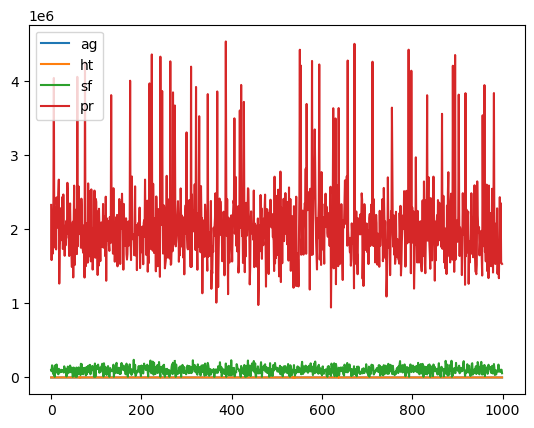

In [29]:
Data_Needed.plot()

In [30]:
Data_Needed.isna().sum()

nm    0
ag    0
lg    0
ct    0
ht    5
sf    6
rt    9
ps    0
bd    0
hr    0
pr    0
dtype: int64

In [31]:
x = Data_Needed.drop(columns= ['nm'])
x


,ag,lg,ct,ht,sf,rt,ps,bd,hr,pr
0,32,Ligue 1,german,172.0,103671.0,amazing,defender,False,tall,2324698
1,29,La Liga,german,178.0,83181.0,decent,midfielder,False,tall,1581684
2,33,Bundesliga,brazil,172.0,164118.0,amazing,midfielder,False,tall,2255446
3,37,Premier League,german,189.0,154386.0,poor,gk,False,tall,1663689
4,28,Bundesliga,german,173.0,122175.0,amazing,gk,False,tall,1977741
...,...,...,...,...,...,...,...,...,...,...
995,28,Bundesliga,brazil,170.0,74749.0,decent,gk,False,medium,1697401
996,38,Ligue 1,france,184.0,103975.0,decent,attacker,False,medium,2349498
997,33,La Liga,brazil,166.0,103267.0,decent,defender,False,short,1540178
998,27,Bundesliga,brazil,184.0,103987.0,poor,defender,False,tall,1538843


In [32]:
Data_Needed

,nm,ag,lg,ct,ht,sf,rt,ps,bd,hr,pr
0,Paul Blair,32,Ligue 1,german,172.0,103671.0,amazing,defender,False,tall,2324698
1,Susan Murphy,29,La Liga,german,178.0,83181.0,decent,midfielder,False,tall,1581684
2,Eric Malone,33,Bundesliga,brazil,172.0,164118.0,amazing,midfielder,False,tall,2255446
3,Jennifer Hernandez,37,Premier League,german,189.0,154386.0,poor,gk,False,tall,1663689
4,Marcus Campbell,28,Bundesliga,german,173.0,122175.0,amazing,gk,False,tall,1977741
...,...,...,...,...,...,...,...,...,...,...,...
995,Ryan Sampson,28,Bundesliga,brazil,170.0,74749.0,decent,gk,False,medium,1697401
996,Tara Ross,38,Ligue 1,france,184.0,103975.0,decent,attacker,False,medium,2349498
997,Kenneth Jones,33,La Liga,brazil,166.0,103267.0,decent,defender,False,short,1540178
998,Scott Kim,27,Bundesliga,brazil,184.0,103987.0,poor,defender,False,tall,1538843


In [33]:
y = Data_Needed['pr']
y

0      2324698
1      1581684
2      2255446
3      1663689
4      1977741
        ...   
995    1697401
996    2349498
997    1540178
998    1538843
999    1529895
Name: pr, Length: 1000, dtype: int64

In [34]:
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y, random_state = 5 , test_size= 0.2 )
x_train  = x_train.fillna(np.nan)
x_train.dropna()

# i dont know if this section is correct or not ?!? as i wanted to see the nan in the output but i dont ?!?

,ag,lg,ct,ht,sf,rt,ps,bd,hr,pr
40,33,Serie A,brazil,181.0,68489.0,poor,attacker,False,tall,1636604
977,17,Ligue 1,brazil,171.0,156368.0,amazing,attacker,False,medium,2542570
829,28,La Liga,italy,168.0,142396.0,decent,gk,False,short,1404606
973,26,Premier League,italy,171.0,140455.0,poor,attacker,False,tall,2214760
874,29,Bundesliga,italy,175.0,224248.0,decent,attacker,False,tall,2007476
...,...,...,...,...,...,...,...,...,...,...
400,22,Serie A,italy,167.0,55125.0,decent,midfielder,False,short,1822354
118,35,Serie A,german,174.0,145898.0,decent,midfielder,False,medium,1975763
701,35,Premier League,german,180.0,55455.0,decent,gk,False,tall,1983045
206,32,Bundesliga,england,187.0,186602.0,decent,midfielder,False,short,2118585


In [35]:
x_train.isna().sum()

ag    0
lg    0
ct    0
ht    4
sf    5
rt    8
ps    0
bd    0
hr    0
pr    0
dtype: int64

In [36]:
Nan_mean = SimpleImputer(strategy = 'mean')
x_train[['sf' , 'ht']] = Nan_mean.fit_transform(x_train[['sf' , 'ht']])
x_test [['sf' , 'ht']]= Nan_mean.transform(x_test[['sf' , 'ht']])
x_train


,ag,lg,ct,ht,sf,rt,ps,bd,hr,pr
40,33,Serie A,brazil,181.0,68489.0,poor,attacker,False,tall,1636604
977,17,Ligue 1,brazil,171.0,156368.0,amazing,attacker,False,medium,2542570
829,28,La Liga,italy,168.0,142396.0,decent,gk,False,short,1404606
973,26,Premier League,italy,171.0,140455.0,poor,attacker,False,tall,2214760
874,29,Bundesliga,italy,175.0,224248.0,decent,attacker,False,tall,2007476
...,...,...,...,...,...,...,...,...,...,...
400,22,Serie A,italy,167.0,55125.0,decent,midfielder,False,short,1822354
118,35,Serie A,german,174.0,145898.0,decent,midfielder,False,medium,1975763
701,35,Premier League,german,180.0,55455.0,decent,gk,False,tall,1983045
206,32,Bundesliga,england,187.0,186602.0,decent,midfielder,False,short,2118585


In [37]:
Nan_constant = SimpleImputer(strategy = 'constant' , fill_value='decent')

x_train[['rt']] = Nan_constant.fit_transform(x_train[['rt']])
x_test[['rt']] = Nan_constant.transform(x_test[['rt']])
x_train

,ag,lg,ct,ht,sf,rt,ps,bd,hr,pr
40,33,Serie A,brazil,181.0,68489.0,poor,attacker,False,tall,1636604
977,17,Ligue 1,brazil,171.0,156368.0,amazing,attacker,False,medium,2542570
829,28,La Liga,italy,168.0,142396.0,decent,gk,False,short,1404606
973,26,Premier League,italy,171.0,140455.0,poor,attacker,False,tall,2214760
874,29,Bundesliga,italy,175.0,224248.0,decent,attacker,False,tall,2007476
...,...,...,...,...,...,...,...,...,...,...
400,22,Serie A,italy,167.0,55125.0,decent,midfielder,False,short,1822354
118,35,Serie A,german,174.0,145898.0,decent,midfielder,False,medium,1975763
701,35,Premier League,german,180.0,55455.0,decent,gk,False,tall,1983045
206,32,Bundesliga,england,187.0,186602.0,decent,midfielder,False,short,2118585


In [38]:
x_train['rt'].unique

<bound method Series.unique of 40        poor
977    amazing
829     decent
973       poor
874     decent
        ...   
400     decent
118     decent
701     decent
206     decent
867       poor
Name: rt, Length: 800, dtype: object>

In [39]:
ohe = OneHotEncoder(handle_unknown ='ignore',sparse_output=False).set_output(transform ='pandas')


In [40]:
ohe_transform = ohe.fit_transform(x_train[['lg' , 'ct']])
ohe_transform


,lg_Bundesliga,lg_La Liga,lg_Ligue 1,lg_Premier League,lg_Serie A,ct_argentina,ct_brazil,ct_england,ct_france,ct_german,ct_italy,ct_other
40,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
977,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
829,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
973,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
874,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
118,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
701,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
206,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [41]:
x_train = pd.concat([x_train, ohe_transform]).drop(columns = ['lg' ,'ct'])
x_train
# dont know what's wrong here so that the nan appeared ?!?


,ag,ht,sf,rt,ps,bd,hr,pr,lg_Bundesliga,lg_La Liga,lg_Ligue 1,lg_Premier League,lg_Serie A,ct_argentina,ct_brazil,ct_england,ct_france,ct_german,ct_italy,ct_other
40,33.0,181.0,68489.0,poor,attacker,False,tall,1636604.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
977,17.0,171.0,156368.0,amazing,attacker,False,medium,2542570.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829,28.0,168.0,142396.0,decent,gk,False,short,1404606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
973,26.0,171.0,140455.0,poor,attacker,False,tall,2214760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874,29.0,175.0,224248.0,decent,attacker,False,tall,2007476.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [42]:
x_train['rt'].unique()

array(['poor', 'amazing', 'decent', nan], dtype=object)

In [ ]:
skills =['poor', 'amazing', 'decent' ]

In [44]:
la_enc = OrdinalEncoder(categories= [skills])

In [45]:
x_train[['rt']] = la_enc.fit_transform(x_train[['rt']])
x_train

ValueError: Found unknown categories [nan] in column 0 during fit